In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [3]:
path = "C:\\Users\\mayan\\Downloads\\retail_store_sales.csv"
df = pd.read_csv(path)

In [6]:
df.head()


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [7]:
df.shape

(12575, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

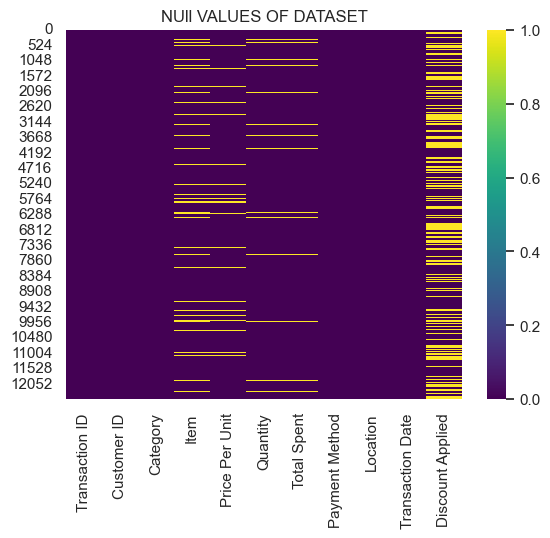

<Figure size 100x100 with 0 Axes>

In [41]:
sns.heatmap(df.isnull() , cbar = True , cmap='viridis')
plt.title("NUll VALUES OF DATASET")
plt.figure(figsize= (1,1))
plt.show()

In [28]:
#df["Customer ID"].value_counts().sort_values()
df["Customer ID"].sort_values()

1631     CUST_01
10084    CUST_01
440      CUST_01
6082     CUST_01
5245     CUST_01
          ...   
5248     CUST_25
2657     CUST_25
10663    CUST_25
10964    CUST_25
5251     CUST_25
Name: Customer ID, Length: 12575, dtype: object

In [53]:
customer1 = df[(df["Customer ID"] == "CUST_01")]
print(customer1)
customer1.groupby("Customer ID")["Payment Method"].value_counts()


      Transaction ID Customer ID                            Category  \
19       TXN_4206593     CUST_01                           Furniture   
54       TXN_8218431     CUST_01                           Furniture   
64       TXN_6952276     CUST_01                                Food   
66       TXN_5885894     CUST_01                          Patisserie   
97       TXN_9619859     CUST_01                            Butchers   
...              ...         ...                                 ...   
12422    TXN_4247005     CUST_01                           Furniture   
12435    TXN_5147764     CUST_01                           Furniture   
12482    TXN_7038132     CUST_01                       Milk Products   
12500    TXN_6801032     CUST_01  Computers and electric accessories   
12566    TXN_6298574     CUST_01                       Milk Products   

               Item  Price Per Unit  Quantity  Total Spent  Payment Method  \
19              NaN            35.0       NaN          Na

Customer ID  Payment Method
CUST_01      Digital Wallet    184
             Credit Card       167
             Cash              156
Name: count, dtype: int64

In [54]:
df["Category"].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

In [58]:
df["Item"].unique()

array(['Item_10_PAT', 'Item_17_MILK', 'Item_12_BUT', 'Item_16_BEV',
       'Item_6_FOOD', nan, 'Item_1_FOOD', 'Item_16_FUR', 'Item_22_BUT',
       'Item_3_BUT', 'Item_2_FOOD', 'Item_24_PAT', 'Item_16_MILK',
       'Item_17_PAT', 'Item_13_EHE', 'Item_7_BEV', 'Item_4_EHE',
       'Item_10_FOOD', 'Item_14_FUR', 'Item_20_BUT', 'Item_25_FUR',
       'Item_14_FOOD', 'Item_22_PAT', 'Item_11_FOOD', 'Item_6_PAT',
       'Item_21_EHE', 'Item_25_BEV', 'Item_23_FOOD', 'Item_10_FUR',
       'Item_11_BEV', 'Item_23_BUT', 'Item_22_BEV', 'Item_10_EHE',
       'Item_24_BUT', 'Item_8_BEV', 'Item_3_FOOD', 'Item_12_FOOD',
       'Item_16_CEA', 'Item_11_PAT', 'Item_16_BUT', 'Item_5_CEA',
       'Item_19_MILK', 'Item_23_FUR', 'Item_7_FUR', 'Item_15_CEA',
       'Item_6_MILK', 'Item_24_CEA', 'Item_22_CEA', 'Item_22_FOOD',
       'Item_2_BUT', 'Item_14_PAT', 'Item_12_PAT', 'Item_18_FOOD',
       'Item_1_PAT', 'Item_4_BEV', 'Item_22_FUR', 'Item_7_PAT',
       'Item_20_CEA', 'Item_20_FOOD', 'Item_11_FUR', 'Item

In [68]:
x = df[df["Item"].isnull()]
x.tail(30)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12327,TXN_5545903,CUST_25,Milk Products,NaN,21.5,NaN,NaN,Credit Card,In-store,2022-03-25,True
12330,TXN_3708702,CUST_11,Beverages,NaN,NaN,4.0,20.0,Credit Card,Online,2022-08-24,False
12337,TXN_6292699,CUST_18,Computers and electric accessories,NaN,NaN,8.0,244.0,Credit Card,In-store,2025-01-14,NaN
12339,TXN_5105838,CUST_17,Electric household essentials,NaN,NaN,3.0,123.0,Digital Wallet,Online,2024-05-24,True
12365,TXN_2634754,CUST_07,Electric household essentials,NaN,NaN,3.0,78.0,Cash,Online,2022-05-15,True
12369,TXN_2414883,CUST_04,Food,NaN,41.0,NaN,NaN,Cash,In-store,2022-02-01,NaN
12386,TXN_4266749,CUST_11,Furniture,NaN,NaN,7.0,266.0,Cash,In-store,2022-08-10,True
12387,TXN_7014462,CUST_24,Patisserie,NaN,NaN,2.0,37.0,Credit Card,Online,2024-11-29,False
12396,TXN_1720372,CUST_20,Food,NaN,11.0,NaN,NaN,Credit Card,In-store,2023-10-23,True
12410,TXN_9279801,CUST_03,Furniture,NaN,39.5,NaN,NaN,Credit Card,In-store,2022-05-27,NaN


In [ ]:
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"] , errors= "coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"] , errors= "coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"] , errors= "coerce")


In [96]:
df_backup = df.copy()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11971 non-null  object 
 1   Customer ID       11971 non-null  object 
 2   Category          11971 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11362 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    11971 non-null  object 
 8   Location          11971 non-null  object 
 9   Transaction Date  11971 non-null  object 
 10  Discount Applied  7983 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [112]:
df["Price Per Unit"] =  df["Total Spent"]/ df["Quantity"]

C:\Users\mayan\AppData\Local\Temp\ipykernel_23188\3732557647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price Per Unit"] =  df["Total Spent"]/ df["Quantity"]


In [124]:
x =df[["Price Per Unit" ,"Quantity" , "Total Spent"]].isnull().sum()
x

Price Per Unit    0
Quantity          0
Total Spent       0
dtype: int64

In [ ]:
#df["Customer ID"].value_counts().sort_values()
df["Customer ID"].sort_values()

1631     CUST_01
10084    CUST_01
440      CUST_01
6082     CUST_01
5245     CUST_01
          ...   
5248     CUST_25
2657     CUST_25
10663    CUST_25
10964    CUST_25
5251     CUST_25
Name: Customer ID, Length: 12575, dtype: object

In [ ]:
#df["Customer ID"].value_counts().sort_values()
df["Customer ID"].sort_values()

1631     CUST_01
10084    CUST_01
440      CUST_01
6082     CUST_01
5245     CUST_01
          ...   
5248     CUST_25
2657     CUST_25
10663    CUST_25
10964    CUST_25
5251     CUST_25
Name: Customer ID, Length: 12575, dtype: object

In [ ]:
df = df.dropna(subset=['Quantity', 'Total Spent'], how='all')

In [130]:
df["Item"].isnull().sum()

609

In [139]:
df[["Item", "Category"]]


,Item,Category
0,10,Patisserie
1,17,Milk Products
2,12,Butchers
3,16,Beverages
4,6,Food
...,...,...
12570,23,Patisserie
12571,2,Beverages
12572,7,Butchers
12573,7,Furniture


In [136]:
df["Item_ID"] = df["Item"].str.extract(r"(\d+)") 

In [141]:
df["Item"] = df["Item"].replace({"Item" : "Item_ID"})

In [172]:
df.drop(columns= ("Item"), inplace= True)

In [173]:
df.head()

,Transaction ID,Customer ID,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Item_ID
0,TXN_6867343,CUST_09,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,10
1,TXN_3731986,CUST_22,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,17
2,TXN_9303719,CUST_02,Butchers,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,12
3,TXN_9458126,CUST_06,Beverages,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,16
4,TXN_4575373,CUST_05,Food,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,6


In [149]:
df["Payment Method"].info()

<class 'pandas.core.series.Series'>
Index: 11971 entries, 0 to 12574
Series name: Payment Method
Non-Null Count  Dtype 
--------------  ----- 
11971 non-null  object
dtypes: object(1)
memory usage: 187.0+ KB


In [151]:
df["Location"].value_counts()

Location
Online      6068
In-store    5903
Name: count, dtype: int64

In [156]:
df.groupby(["Location", "Payment Method"])["Discount Applied" ].value_counts()

Location  Payment Method  Discount Applied
In-store  Cash            True                684
                          False               645
          Credit Card     True                636
                          False               633
          Digital Wallet  False               683
                          True                642
Online    Cash            True                703
                          False               673
          Credit Card     True                694
                          False               668
          Digital Wallet  False               662
                          True                660
Name: count, dtype: int64

In [ ]:
df["Total Spent"].median()

108.5

In [168]:
df.groupby("Discount Applied")["Total Spent"].mean()

Discount Applied
False    129.953330
True     130.491043
Name: Total Spent, dtype: float64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11971 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    11971 non-null  object 
 1   Customer ID       11971 non-null  object 
 2   Category          11971 non-null  object 
 3   Price Per Unit    11971 non-null  float64
 4   Quantity          11971 non-null  float64
 5   Total Spent       11971 non-null  float64
 6   Payment Method    11971 non-null  object 
 7   Location          11971 non-null  object 
 8   Transaction Date  11971 non-null  object 
 9   Discount Applied  7983 non-null   object 
 10  Item_ID           11362 non-null  object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [181]:
df["Item_ID"].isnull().sum()

609

In [187]:
df["Item_ID"].unique()

array(['10', '17', '12', '16', '6', nan, '1', '22', '3', '2', '24', '13',
       '7', '4', '14', '20', '25', '11', '21', '23', '8', '5', '19', '15',
       '18', '9'], dtype=object)

In [197]:
df.dropna(subset=["Item_ID"], inplace=True)


In [200]:
df.head(10)

,Transaction ID,Customer ID,Category,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Item_ID
0,TXN_6867343,CUST_09,Patisserie,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,10
1,TXN_3731986,CUST_22,Milk Products,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,17
2,TXN_9303719,CUST_02,Butchers,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,12
3,TXN_9458126,CUST_06,Beverages,27.5,9.0,247.5,Credit Card,Online,2022-05-07,True,16
4,TXN_4575373,CUST_05,Food,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,6
6,TXN_3652209,CUST_07,Food,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True,1
8,TXN_9728486,CUST_23,Furniture,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False,16
9,TXN_2722661,CUST_25,Butchers,36.5,3.0,109.5,Cash,Online,2024-03-14,False,22
10,TXN_8776416,CUST_22,Butchers,8.0,9.0,72.0,Cash,In-store,2024-12-14,True,3
12,TXN_5874772,CUST_23,Food,6.5,7.0,45.5,Cash,Online,2023-09-09,True,2


In [213]:
df_backup["Discount Applied"].fillna(df_backup["Discount Applied"].mode()[0] , inplace = True)

C:\Users\mayan\AppData\Local\Temp\ipykernel_23188\1577812757.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_backup["Discount Applied"].fillna(df_backup["Discount Applied"].mode()[0] , inplace = True)


In [225]:
df_backup["Discount Applied"].unique()

array([1, 0])

In [224]:
df_backup["Discount Applied"] = df_backup["Discount Applied"].astype(int)


In [226]:
df["discount_applied"] = df_backup["Discount Applied"]

In [202]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

In [203]:
df.columns = df.columns.str.lower()

In [205]:
df.columns = df.columns.str.replace(' ', '_')


In [206]:
df.columns

Index(['transaction_id', 'customer_id', 'category', 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location',
       'transaction_date', 'discount_applied', 'item_id'],
      dtype='object')

In [207]:
dfback = df.copy()

In [228]:
column_neworder = ['transaction_id','transaction_date', 'customer_id', 'category', 'item_id' , 'price_per_unit',
       'quantity', 'total_spent', 'payment_method', 'location', 'discount_applied']
df= df[column_neworder]

In [256]:
df.head()

,transaction_id,transaction_date,customer_id,category,item_id,price_per_unit,quantity,total_spent,payment_method,location,discount_applied
0,TXN_6867343,2024-04-08,CUST_09,Patisserie,10,18.5,10.0,185.0,Digital Wallet,Online,1
1,TXN_3731986,2023-07-23,CUST_22,Milk Products,17,29.0,9.0,261.0,Digital Wallet,Online,1
2,TXN_9303719,2022-10-05,CUST_02,Butchers,12,21.5,2.0,43.0,Credit Card,Online,0
3,TXN_9458126,2022-05-07,CUST_06,Beverages,16,27.5,9.0,247.5,Credit Card,Online,1
4,TXN_4575373,2022-10-02,CUST_05,Food,6,12.5,7.0,87.5,Digital Wallet,Online,0


In [245]:
df.drop(columns=["calculated_total"], inplace= True)

In [ ]:
df["item_id"] = df["item_id"].astype(int)

In [255]:
df["item_id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11362 entries, 0 to 11361
Series name: item_id
Non-Null Count  Dtype
--------------  -----
11362 non-null  int32
dtypes: int32(1)
memory usage: 44.5 KB


In [254]:
df.reset_index(drop=True, inplace=True)


In [257]:
df.to_csv("retai_store_sales.csv")